<a href="https://colab.research.google.com/github/kishore779/Pytorch_Programming/blob/main/Pytorch_01_WorkFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Pytorch Overflow
1.data
2:build model
3:training
4.make prediction
5.save and load model
6.put all together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.9.0+cu126'

##Use linear regression formula to make straight line with known **parameters**

In [2]:
weight = 0.6
bias = 0.7

X = torch.arange(0,1,0.02).unsqueeze(dim=1)
y = weight * X  + bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.7000],
         [0.7120],
         [0.7240],
         [0.7360],
         [0.7480],
         [0.7600],
         [0.7720],
         [0.7840],
         [0.7960],
         [0.8080]]))

In [3]:
len(X),len(y)

(50, 50)

##Spilting the data into training and testing for model

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [5]:
def plot_predictions(train_data= X_train,
                     train_label=y_train,
                     test_data= X_test,
                     test_label = y_test,
                     predictions =None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_label,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_label, c="y", s=4, label="Training data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4, label ="Predictiond\s")

  plt.legend(prop={"size":14});

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3724627755.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.scatter(test_data,predictions,c="r",s=4, label ="Predictiond\s")


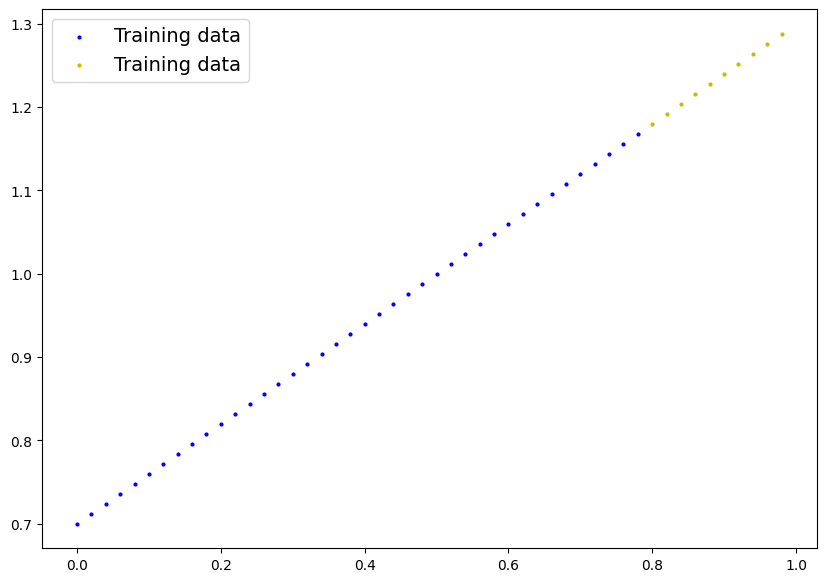

In [6]:
plot_predictions();

In [7]:
#Create linear reg model class
from torch import nn

class LinearRegressionModel(nn.Module):
   def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype = float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = float))
   def forward(self, x: torch.Tensor) ->torch.Tensor:
    return self.weights * x + self.bias

###Checking te contents of our Pytorch Model

In [8]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float64, requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [10]:
##prediction on the models

with torch.inference_mode():
  y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], dtype=torch.float64)

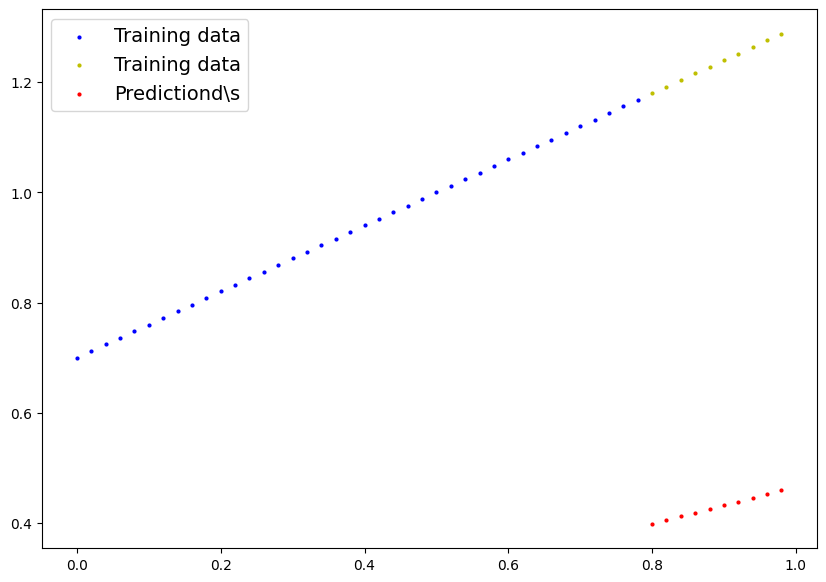

In [11]:
plot_predictions(predictions = y_pred)

In [12]:
##loss fn
loss_fn = nn.L1Loss()
loss_fn

##optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

##Building a training loop (and testing loop) in pytorch

In [13]:
torch.manual_seed(42)
#epoch is a one loop through the data
epochs = 1000

epoch_count = []
loss_values =[]
test_loss_values =[]

for epoch in range(epochs):

  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  #Calculate the loss
  loss = loss_fn(y_pred, y_train)

  #Optimizer zero grad
  optimizer.zero_grad()

  #perform backpropagation
  loss.backward()

  #step the optimizer
  optimizer.step()



  ## Testing the data
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if(epoch % 10 == 0):
    epoch_count.append(epoch)
    loss_values.append(loss.item())
    test_loss_values.append(test_loss.item())

    print(f"Epoch : {epoch} | Loss : {loss} | Test_loss : {test_loss}")

    print(model_0.state_dict())


Epoch : 0 | Loss : 0.6738813523076025 | Test_loss : 0.8041891034341061
OrderedDict({'weights': tensor([0.3371], dtype=torch.float64), 'bias': tensor([0.1298], dtype=torch.float64)})
Epoch : 10 | Loss : 0.6623603523712378 | Test_loss : 0.7907181034695222
OrderedDict({'weights': tensor([0.3410], dtype=torch.float64), 'bias': tensor([0.1398], dtype=torch.float64)})
Epoch : 20 | Loss : 0.650839352434873 | Test_loss : 0.7772471035049383
OrderedDict({'weights': tensor([0.3449], dtype=torch.float64), 'bias': tensor([0.1498], dtype=torch.float64)})
Epoch : 30 | Loss : 0.6393183524985082 | Test_loss : 0.7637761035403544
OrderedDict({'weights': tensor([0.3488], dtype=torch.float64), 'bias': tensor([0.1598], dtype=torch.float64)})
Epoch : 40 | Loss : 0.6277973525621436 | Test_loss : 0.7503051035757705
OrderedDict({'weights': tensor([0.3527], dtype=torch.float64), 'bias': tensor([0.1698], dtype=torch.float64)})
Epoch : 50 | Loss : 0.616276352625779 | Test_loss : 0.7368341036111866
OrderedDict({'we

In [14]:
 with torch.inference_mode():
  y_pred_new = model_0(X_test)

In [15]:
import numpy as np

np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([6.73881352e-01, 6.62360370e-01, 6.50839329e-01, 6.39318347e-01,
        6.27797365e-01, 6.16276324e-01, 6.04755342e-01, 5.93234360e-01,
        5.81713378e-01, 5.70192337e-01, 5.58671355e-01, 5.47150373e-01,
        5.35629332e-01, 5.24108350e-01, 5.12587368e-01, 5.01066327e-01,
        4.89545345e-01, 4.78024364e-01, 4.66503352e-01, 4.54982340e-01,
        4.43461359e-01, 4.31940347e-01, 4.20419365e-01, 4.08898354e-01,
        3.97377342e-01, 3.85856360e-01, 3.74335349e-01, 3.62814367e-01,
        3.51293355e-01, 3.39772344e-01, 3.28251362e-01, 3.16730350e-01,
        3.05209368e-01, 2.93688357e-01, 2.82167345e-01, 2.70646363e-01,
        2.59125352e-01, 2.47604355e-01, 2.36083359e-01, 2.24562362e-01,
        2.13041350e-01, 2.01520354e-01, 1.89999357e-01, 1.78478360e-01,
        1.66957349e-01, 1.55436352e-01, 1.43915355e-01, 1.32394359e-01,
        1.20873354e-01, 1.09352358e-01, 9.78313535e-02, 8.63103569e-02,
        7.47893527e-02, 6.32683560e-02, 5.17473556e-02, 4.022635

In [16]:
weight, bias

(0.6, 0.7)

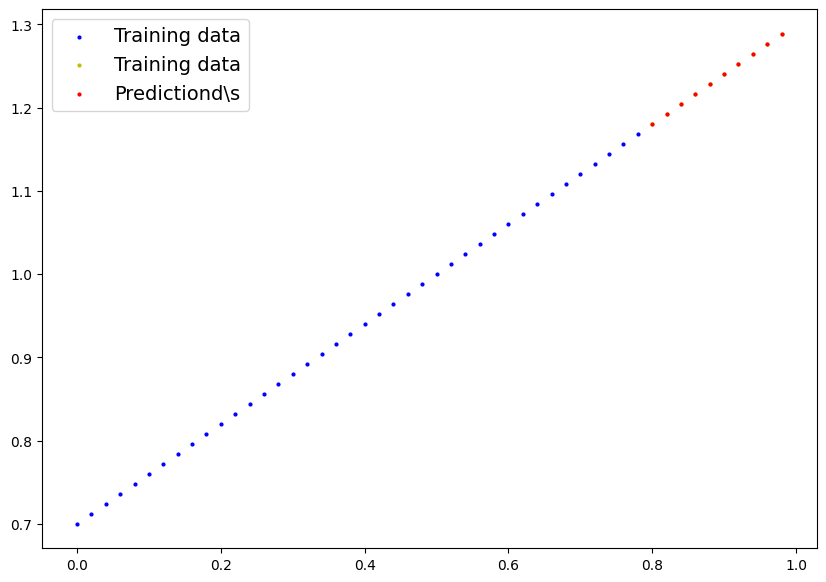

In [17]:
plot_predictions(predictions=y_pred_new)

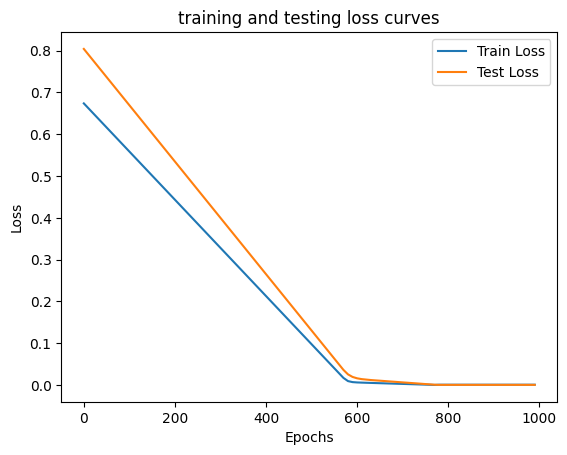

In [18]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label = "Train Loss")
plt.plot(epoch_count,test_loss_values, label = "Test Loss")
plt.title("training and testing loss curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

##Saving the Pytorch Model

* torch.save()
* torch.load()
* torch.nn.Modeule.load_state_dict() - to load a model saved state

In [19]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5998], dtype=torch.float64)),
             ('bias', tensor([0.7010], dtype=torch.float64))])

In [20]:
from pathlib import Path
Model_Path = Path("models")
Model_Path.mkdir(parents = True, exist_ok = True)

Model_Name = "01_pytorch_workflow_model0.pth"
Model_save_path = Model_Path / Model_Name

Model_save_path

PosixPath('models/01_pytorch_workflow_model0.pth')

In [21]:
torch.save(model_0.state_dict(),
           Model_save_path)

## Loading a Pytorch model

In [22]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load (f=Model_save_path))

<All keys matched successfully>

In [23]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5998], dtype=torch.float64)),
             ('bias', tensor([0.7010], dtype=torch.float64))])

In [24]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[1.1808],
        [1.1928],
        [1.2048],
        [1.2168],
        [1.2288],
        [1.2408],
        [1.2528],
        [1.2648],
        [1.2768],
        [1.2888]], dtype=torch.float64)

In [25]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[1.1808],
        [1.1928],
        [1.2048],
        [1.2168],
        [1.2288],
        [1.2408],
        [1.2528],
        [1.2648],
        [1.2768],
        [1.2888]], dtype=torch.float64)

In [26]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##6. Putting it together

In [27]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [28]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [29]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

## Spilting the data

In [30]:
data_spilt = int(0.8 * len(X))
data_spilt

40

In [31]:
X_train,y_train = X[:data_spilt], y[:data_spilt]
X_test,y_test = X[data_spilt:],  y[data_spilt:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

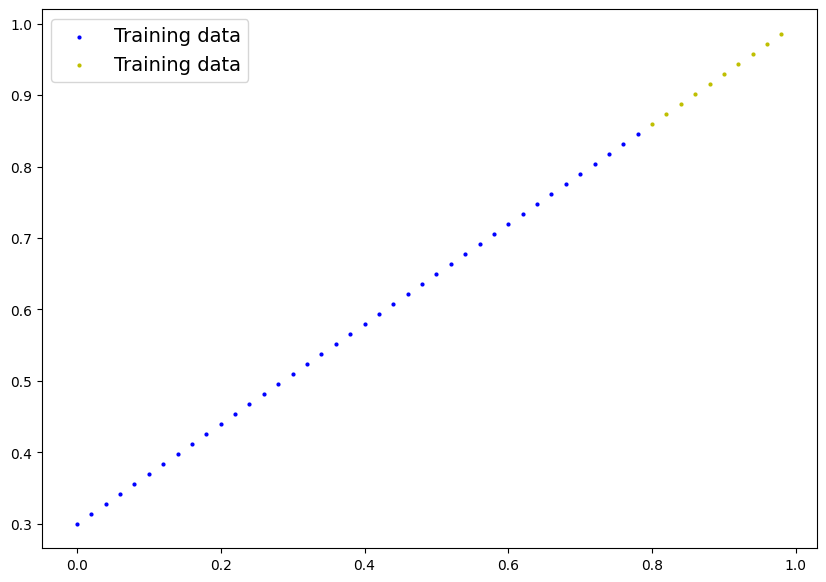

In [32]:
plot_predictions(X_train,y_train,X_test,y_test)

##7. Use of Built in Linear Model

In [33]:
## crating the linear model by subclassing nn.Module

class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    self.linear_layer = nn.Linear(in_features = 1,
                                  out_features= 1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)

model_1 = LinearRegressionModelv2()
model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [34]:
next(model_1.parameters()).device

device(type='cpu')

In [35]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [36]:
## loss funtion

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.001)


In [37]:
torch.manual_seed(42)

epochs = 200

##move to gpu then we would use
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  ## 1. forward pass
  y_pred = model_1(X_train)

  ## 2. loss fn
  loss = loss_fn(y_pred, y_train)

  ## 3. ooptimizer
  optimizer.zero_grad()

  ## 4.perform backpropagation
  loss.backward()

  ## 5.optimizer
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if(epoch % 10 == 0):
    print(f"Epoch : {epoch} | Loss : {loss} | Test_Loss : {test_loss}")



Epoch : 0 | Loss : 0.5551779866218567 | Test_Loss : 0.5861001014709473
Epoch : 10 | Loss : 0.5436570644378662 | Test_Loss : 0.5726293921470642
Epoch : 20 | Loss : 0.5321362614631653 | Test_Loss : 0.5591585040092468
Epoch : 30 | Loss : 0.5206153988838196 | Test_Loss : 0.5456876754760742
Epoch : 40 | Loss : 0.5090945363044739 | Test_Loss : 0.5322169661521912
Epoch : 50 | Loss : 0.49757376313209534 | Test_Loss : 0.5187460780143738
Epoch : 60 | Loss : 0.48605284094810486 | Test_Loss : 0.5052752494812012
Epoch : 70 | Loss : 0.47453203797340393 | Test_Loss : 0.49180442094802856
Epoch : 80 | Loss : 0.4630111753940582 | Test_Loss : 0.4783336818218231
Epoch : 90 | Loss : 0.4514903724193573 | Test_Loss : 0.4648628234863281
Epoch : 100 | Loss : 0.4399694502353668 | Test_Loss : 0.4513919949531555
Epoch : 110 | Loss : 0.4284486472606659 | Test_Loss : 0.4379211962223053
Epoch : 120 | Loss : 0.4169278144836426 | Test_Loss : 0.4244503974914551
Epoch : 130 | Loss : 0.4054069519042969 | Test_Loss : 0.41

In [38]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [39]:
weight,bias

(0.7, 0.3)

In [41]:
model_1.eval()
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

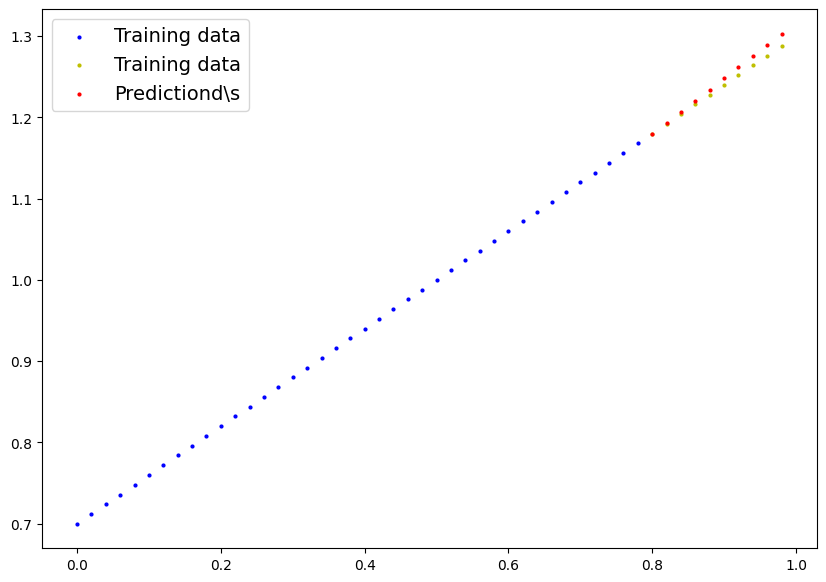

In [42]:
plot_predictions(predictions = y_preds.cpu())

In [44]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok=True)

MODEL_NAME = "01_gpu_linear_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_gpu_linear_model')

In [50]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6865]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.6300], device='cuda:0'))])

In [53]:
torch.save(model_1.state_dict(),MODEL_SAVE_PATH)

In [54]:
#Loaded model
loaded_model_1 = LinearRegressionModelv2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [56]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [58]:
#Evaluate the loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_pred = loaded_model_1(X_test)
loaded_pred

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

In [59]:
model_1.eval()
with torch.inference_mode():
  model_pred = model_1(X_test)
model_pred

tensor([[1.1792],
        [1.1930],
        [1.2067],
        [1.2204],
        [1.2342],
        [1.2479],
        [1.2616],
        [1.2754],
        [1.2891],
        [1.3028]], device='cuda:0')

In [60]:
loaded_pred == model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')